# Import packages

In [1]:
# Added to be able to run in Google Colab. Run this cell if running the notebook in a hosted runtime. Don't run for a local runtime.

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
import os
import pickle
import PIL.Image
import numpy as np
import matplotlib.pyplot as plt
import random

# Set path names 


In [3]:
# Set paths to image stacks, masks, and annotation files. 

path_to_image = '/content/gdrive/MyDrive/ENSO_project/01_data/02_tiles'
path_to_label = '/content/gdrive/MyDrive/ENSO_project/01_data/04_masks'
# path_to_annotCombo = '/content/gdrive/MyDrive/ENSO_project/01_data/03_annot'

In [4]:
# Set the project name and save directory for the project

project_name = 'Finetuning_NewSlidesOnly'
trial = 'Trial_01' 

exp_dir = '/content/gdrive/MyDrive/ENSO_project/02_det/exp' # experiment directory
exp_dir = os.path.join(exp_dir, project_name)
save_dir = os.path.join(exp_dir, trial) 
if not os.path.exists(save_dir): 
    os.makedirs(save_dir)

# Split data into training and test (validation) sets

In [38]:
# Make a list of the names of all samples. The list is not randomized. 
tmpSampleList = []

for slide in os.listdir(path_to_label):
  cur_path_to_label = os.path.join(path_to_label, slide)
  for sample in os.listdir(cur_path_to_label):
    tmpSampleList.append((slide, sample))

random.shuffle(tmpSampleList)

print(len(tmpSampleList))
print(tmpSampleList)

601
[('PAL1999_C6_sample21_slide1', '34841x_43733y'), ('PAL1999_B2_sample130_slide1', '45362x_38926y'), ('PAL1999_C6_sample21_slide1', '56421x_13744y'), ('PAL1999_C6_sample21_slide1', '48422x_40313y'), ('PAL1999_C3_sample21_slide1', '34802x_26886y'), ('PAL1999_C6_sample21_slide1', '57617x_11691y'), ('PAL1999_C1_sample55_slide1', '11315x_27171y'), ('PAL1999_C1_sample55_slide1', '10677x_26666y'), ('PAL1999_C1_sample15_slide1', '63365x_41094y'), ('PAL1999_C6_sample21_slide1', '46386x_68523y'), ('PAL1999_B2_sample130_slide1', '60691x_37907y'), ('PAL1999_C6_sample51_slide1', '26666x_11879y'), ('PAL1999_B2_sample101_slide1', '66870x_41351y'), ('PAL1999_C3_sample67_slide1', '36745x_23019y'), ('PAL1999_C3_sample67_slide1', '15558x_47045y'), ('PAL1999_C1_sample15_slide1', '64388x_72769y'), ('PAL1999_B2_sample130_slide1', '70683x_39679y'), ('PAL1999_C6_sample51_slide1', '64698x_20490y'), ('PAL1999_C1_sample15_slide1', '64400x_60500y'), ('PAL1999_C1_sample15_slide1', '64760x_23718y'), ('PAL1999_C

In [39]:
# Split the dataset into 80% training and 20% test (validation) sets

train_det_dict = {}
test_det_dict = {}
train_det_list = []
test_det_list = []

trRatio = 0.8
if len(tmpSampleList)>0:
    trNum = round(len(tmpSampleList)*trRatio)
    tsNum = len(tmpSampleList) - trNum
    start_num = tsNum*1   # You may change the multiplier for each trial to test different splits of data. e.g. 4 for trial 1, 0 for trial 2, 1 for trial 3.
    
    train_det_list += tmpSampleList[0:start_num]
    test_det_list += tmpSampleList[start_num:start_num + tsNum]    
    train_det_list += tmpSampleList[start_num + tsNum:]          
else: 
    train_det_list += tmpSampleList

In [40]:
# Save all the info in a pickle file to be read in the next notebook

dbinfo = {}
dbinfo['train_det_list'] = train_det_list
dbinfo['test_det_list'] = test_det_list

with open(os.path.join(save_dir,'dbinfo.pkl'), 'wb') as handle:
    pickle.dump(dbinfo, handle) # , protocol=pickle.HIGHEST_PROTOCOL

In [41]:
# See the lengths of the training and test datasets

with open(os.path.join(save_dir,'dbinfo.pkl'), 'rb') as handle:
    dbinfo = pickle.load(handle)

dbinfo.keys(), len(dbinfo['train_det_list']), len(dbinfo['test_det_list'])

(dict_keys(['train_det_list', 'test_det_list']), 481, 120)

In [42]:
dbinfo['train_det_list']

[('PAL1999_C6_sample21_slide1', '34841x_43733y'),
 ('PAL1999_B2_sample130_slide1', '45362x_38926y'),
 ('PAL1999_C6_sample21_slide1', '56421x_13744y'),
 ('PAL1999_C6_sample21_slide1', '48422x_40313y'),
 ('PAL1999_C3_sample21_slide1', '34802x_26886y'),
 ('PAL1999_C6_sample21_slide1', '57617x_11691y'),
 ('PAL1999_C1_sample55_slide1', '11315x_27171y'),
 ('PAL1999_C1_sample55_slide1', '10677x_26666y'),
 ('PAL1999_C1_sample15_slide1', '63365x_41094y'),
 ('PAL1999_C6_sample21_slide1', '46386x_68523y'),
 ('PAL1999_B2_sample130_slide1', '60691x_37907y'),
 ('PAL1999_C6_sample51_slide1', '26666x_11879y'),
 ('PAL1999_B2_sample101_slide1', '66870x_41351y'),
 ('PAL1999_C3_sample67_slide1', '36745x_23019y'),
 ('PAL1999_C3_sample67_slide1', '15558x_47045y'),
 ('PAL1999_C1_sample15_slide1', '64388x_72769y'),
 ('PAL1999_B2_sample130_slide1', '70683x_39679y'),
 ('PAL1999_C6_sample51_slide1', '64698x_20490y'),
 ('PAL1999_C1_sample15_slide1', '64400x_60500y'),
 ('PAL1999_C1_sample15_slide1', '64760x_23718y

In [43]:
dbinfo['test_det_list']

[('PAL1999_C6_sample51_slide1', '34584x_47477y'),
 ('PAL1999_B2_sample101_slide1', '17837x_9530y'),
 ('PAL1999_C6_sample51_slide1', '77591x_45697y'),
 ('PAL1999_B2_sample71_slide1', '90375x_71890y'),
 ('PAL1999_C1_sample15_slide1', '64376x_86078y'),
 ('PAL1999_B2_sample101_slide1', '63305x_34193y'),
 ('PAL1999_C1_sample15_slide1', '65414x_33856y'),
 ('PAL1999_C1_sample15_slide1', '64393x_16573y'),
 ('PAL1999_C6_sample51_slide1', '51184x_48496y'),
 ('PAL1999_C3_sample67_slide1', '11463x_35840y'),
 ('PAL1999_C6_sample21_slide1', '45359x_12719y'),
 ('PAL1999_C3_sample67_slide1', '19632x_31770y'),
 ('PAL1999_C6_sample51_slide1', '47098x_11433y'),
 ('PAL1999_C6_sample51_slide1', '74697x_30110y'),
 ('PAL1999_B2_sample130_slide1', '92364x_37905y'),
 ('PAL1999_C1_sample55_slide1', '44401x_17465y'),
 ('PAL1999_C3_sample21_slide1', '39162x_42402y'),
 ('PAL1999_C3_sample67_slide1', '41098x_80117y'),
 ('PAL1999_B2_sample71_slide1', '66880x_90282y'),
 ('PAL1999_C3_sample67_slide1', '25919x_32172y')

# Visualize an image and mask

In [89]:
set_name='test'  #'test'
sampleList = dbinfo[set_name+'_det_list']

idx = 14  #choose an index less than or equal to the length of the sampleList

current_example= sampleList[idx] 
current_image_path= os.path.join(path_to_image, current_example[0], current_example[1])
current_distTransform_path=os.path.join(path_to_label, current_example[0],current_example[1] )

z = 4     # set to the desired z-plane (0, 8)
img_stack_paths = []
for file in sorted(os.listdir(str(current_image_path))):
    if file.endswith('.png'):
      tmpImg = os.path.join(str(current_image_path), file)
      img_stack_paths.append(tmpImg)
image = PIL.Image.open(img_stack_paths[z])

for file in os.listdir(current_distTransform_path):
  if file.endswith('.png'):
    mask_distanceTransform = PIL.Image.open(os.path.join(current_distTransform_path, file))
    mask_distanceTransform=np.array(mask_distanceTransform)

In [90]:
print(current_example)

('PAL1999_B2_sample130_slide1', '92364x_37905y')


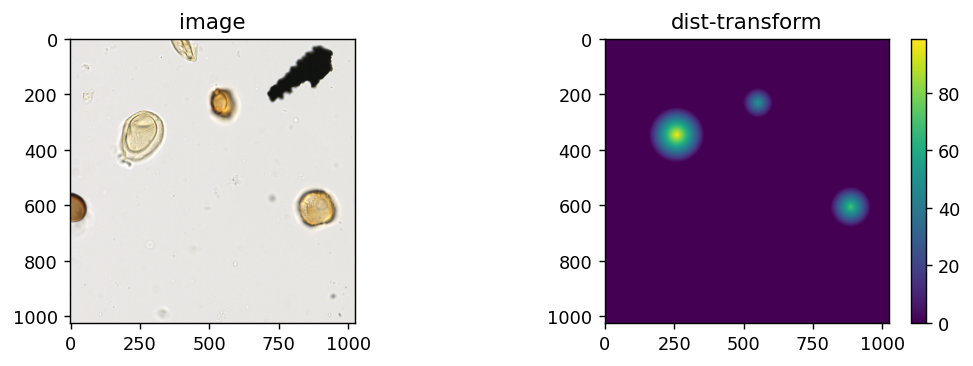

In [91]:
numSample2Show = 1
figWinNumHeight, figWinNumWidth = 3, 2
plt.figure(figsize=(10, 10), dpi=128, facecolor='w', edgecolor='k') # figsize -- inch-by-inch
plt.clf()
subwinCount = 1    


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(image)
#plt.axis('off')
plt.title('image')


plt.subplot(figWinNumHeight,figWinNumWidth,subwinCount)
subwinCount += 1
plt.imshow(mask_distanceTransform)
#plt.axis('off')
plt.title('dist-transform')
plt.colorbar()